# Q-Learning

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors

In [2]:
R = np.array([[0, 0, 0, -1, 0, 0, -1, 0, 0, 0],
              [0, -1, -1, -1, 0, 0, 0, 0, -1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, -1, 0],
              [0, -1, 0, 0, -1, 0, 0, 0, -1, 0],
              [0, -1, 0, 0, -1, -1, -1, -1, -1, 0],
              [0, -1, 0, 0, 0, 0, 0, 0, -1, 0],
              [0, -1, -1, -1, 0, 0, -1, 0, -1, 0],
              [0, 0, 0, -1, 0, 0, -1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, -1, 0, 0, 0]])

In [3]:
alpha = 0.7
gamma = 0.95
max_epsilon = 1.0
min_epsilon = 0.05
decay_rate = 0.0005
epochs = 10000
actions = ['up', 'down', 'left', 'right']
x = len(R)
y = len(R[0])
states = x*y
Q = np.zeros((states, 4))
max_steps = 200
goal_state = 49

In [4]:
state = 0
walls = []

for i in range(x):
    for j in range(y):
        if R[i][j] == -1:
            walls.append(state)
            for a in range(len(actions)):
                Q[state][a] = -1
        state += 1

state = 0

for i in range(x):
    for j in range(y):
        if i == 0 or state - 10 in walls:
            Q[state][actions.index('up')] = -1
        if i == x - 1 or state + 10 in walls:
            Q[state][actions.index('down')] = -1
        if j == 0 or state - 1 in walls:
            Q[state][actions.index('left')] = -1
        if j == y - 1 or state + 1 in walls:
            Q[state][actions.index('right')] = -1
        state += 1

In [5]:
Q

array([[-1.,  0., -1.,  0.],
       [-1., -1.,  0.,  0.],
       [-1., -1.,  0., -1.],
       [-1., -1., -1., -1.],
       [-1.,  0., -1.,  0.],
       [-1.,  0.,  0., -1.],
       [-1., -1., -1., -1.],
       [-1.,  0., -1.,  0.],
       [-1., -1.,  0.,  0.],
       [-1.,  0.,  0., -1.],
       [ 0.,  0., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [-1., -1., -1., -1.],
       [ 0.,  0., -1., -1.],
       [ 0.,  0., -1.,  0.],
       [-1., -1.,  0.,  0.],
       [-1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [-1., -1., -1., -1.],
       [ 0.,  0., -1., -1.],
       [ 0.,  0., -1., -1.],
       [-1., -1., -1., -1.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0., -1.],
       [-1., -

In [6]:
def get_epsilon(epoch):
    return min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * epoch)

In [7]:
def take_action(random_state, epsilon):
    indexes = [index for index,value in enumerate(Q[random_state]) if value != -1]
    possible_actions = [value for index,value in enumerate(actions) if index in indexes]
    if np.random.random() > epsilon:
        if np.max(Q[random_state]) == -1:
            return None
        else:
            return actions[np.argmax(Q[random_state])]
    else:    
        return random.choice(possible_actions)

In [8]:
def update_table(state, action, reward, next_state):
    """
    Update Q table
    """
    #Q[state][actions.index(action)] = alpha * (reward + np.max(Q[next_state]))
    Q[state][actions.index(action)] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][actions.index(action)])

In [9]:
%%time
possible_states = [x for x in range(len(Q)) if x not in walls]
for epoch in range(epochs):
    #print(f"Epoch: {epoch}")
    random_state = random.choice(possible_states)
    epsilon = get_epsilon(epoch)
    for steps in range(max_steps):
        action = take_action(random_state, epsilon)
        if action == None:
            break
        elif action == 'up':
            next_state = random_state - 10
        elif action == 'down':
            next_state = random_state + 10
        elif action == 'left':
            next_state = random_state - 1
        elif action == 'right':
            next_state = random_state + 1
        if random_state != goal_state:
            reward = 0
        elif random_state == goal_state:
            reward = 100
        #print(f"Epoch: {epoch}, steps: {steps}, random state: {random_state}, next state: {next_state}")
        update_table(random_state, action, reward, next_state)
        random_state = next_state
        if reward == 100:
            break

CPU times: user 2.54 s, sys: 40.4 ms, total: 2.58 s
Wall time: 2.53 s


In [10]:
def select_state(state):
    action = actions[np.argmax(Q[state])]
    if action == 'up':
        next_state = state - 10
    elif action == 'down':
        next_state = state + 10
    elif action == 'left':
        next_state = state - 1
    elif action == 'right':
        next_state = state + 1
    return next_state

In [11]:
random_state = random.choice(possible_states)

In [12]:
state = random_state

In [13]:
path = []

In [14]:
while state != goal_state:
    path.append(state)
    next_state = select_state(state)
    state = next_state
    if state == goal_state:
        path.append(state)
        break

In [15]:
state

49

In [16]:
path

[82, 83, 84, 74, 64, 54, 55, 56, 57, 67, 77, 78, 79, 69, 59, 49]

In [17]:
len(path)

16

In [18]:
random_state

82

In [19]:
Q[50]

array([407.39930098, 367.67786914,  -1.        ,  -1.        ])

In [20]:
R_copy = R.copy()

In [21]:
R_copy = R_copy.ravel()

In [22]:
cmap = colors.ListedColormap(['blue', 'white', 'green'])
bounds = [-1, 0, 1]
norm = colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

In [23]:
for x in range(len(R_copy)):
    if x in path:
        R_copy[x] = 1

In [24]:
R_copy = R_copy.reshape(9,10)

In [25]:
R_copy

array([[ 0,  0,  0, -1,  0,  0, -1,  0,  0,  0],
       [ 0, -1, -1, -1,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0],
       [ 0, -1,  0,  0, -1,  0,  0,  0, -1,  0],
       [ 0, -1,  0,  0, -1, -1, -1, -1, -1,  1],
       [ 0, -1,  0,  0,  1,  1,  1,  1, -1,  1],
       [ 0, -1, -1, -1,  1,  0, -1,  1, -1,  1],
       [ 0,  0,  0, -1,  1,  0, -1,  1,  1,  1],
       [ 0,  0,  1,  1,  1,  0, -1,  0,  0,  0]])

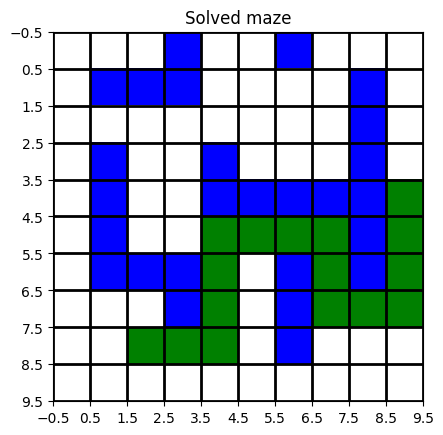

In [26]:
fig, ax = plt.subplots()
ax.imshow(R_copy, cmap=cmap, norm=norm)
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_title("Solved maze")
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));

In [27]:
fig.savefig(f"images/state-{random_state}-path.png")